In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

from tqdm import tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb
# %matplotlib notebook

rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

In [ ]:
# active ecoli euler method. 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
eval_dt = 0.001
max_iter = 3 * 10 ** 1


tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli(tnorm, t_psi, eval_dt=eval_dt, max_iter=max_iter)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops using %fs' % ('planeShearRatex_1d', max_iter, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_theta, Table_phi, Table_psi, Table_eta, Table_X)


In [ ]:
# importlib.reload(spf_tb)
# anim = spf_tb.make_table_video(Table_t, Table_X, Table_P, Table_P2, zm_fct=0.01, stp=1, interval=50)
# anim

In [ ]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 100
update_fun='1fe'
rtol=1e-6
atol=1e-9
eval_dt = 1e-5
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_Petsc(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                     save_every=save_every)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
          Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every)
idx = np.load('../motion_ecoliB01_table/idx.npy')
t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
    pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('save to %s' % t_name)


last norm:  1.62086759309 , 3.2879652742 , 2.74578018371
do_calculate_ecoli_Petsc: run 100 loops/times using 13427.907393s
PETSC RK_1fe rt1e-06, at1e-09, dt1e-05 13427.9s
save to idx023_th0.000_ph0.000_ps0.000.pickle


True

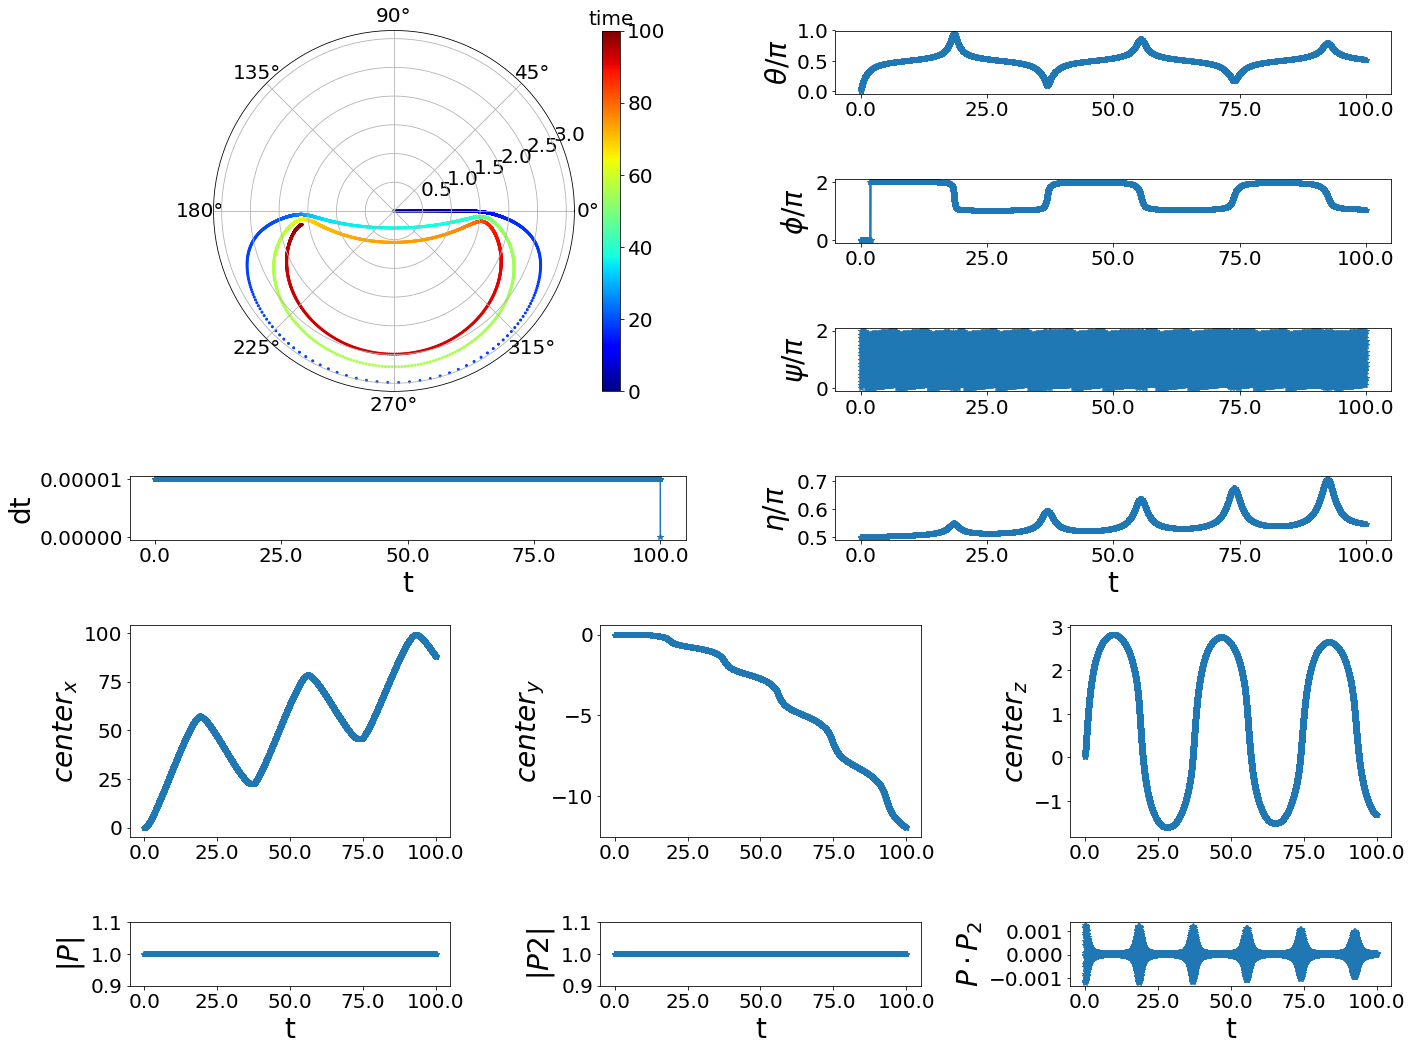

In [31]:
spf_tb.show_table_result(Table_t, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

In [ ]:
# passive ecoli
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 2
update_fun=integrate.Radau
rtol=1e-9
atol=1e-12

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_passive_RK(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_helix_RK', max_t, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_theta, Table_phi, Table_psi, Table_eta, Table_X)


In [ ]:
# passive helix RK method. 
importlib.reload(spf_tb)
t0 = time()
norm = np.array((0, 0, 1))
ini_psi = 0
max_t = 100
Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
           = spf_tb.do_calculate_helix_RK(norm, ini_psi, max_t, rtol=1e-6, atol=1e-9)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_helix_RK', max_t, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta)

last norm:  1.3867176797968013 , 3.1423809393269213 , 0.9872853146009481
do_calculate_ecoli_Petsc: run 1000 loops/times using 57.223287s
scipy_RK45 rt1e-09, at1e-12, dt1e-03 57.2s


True

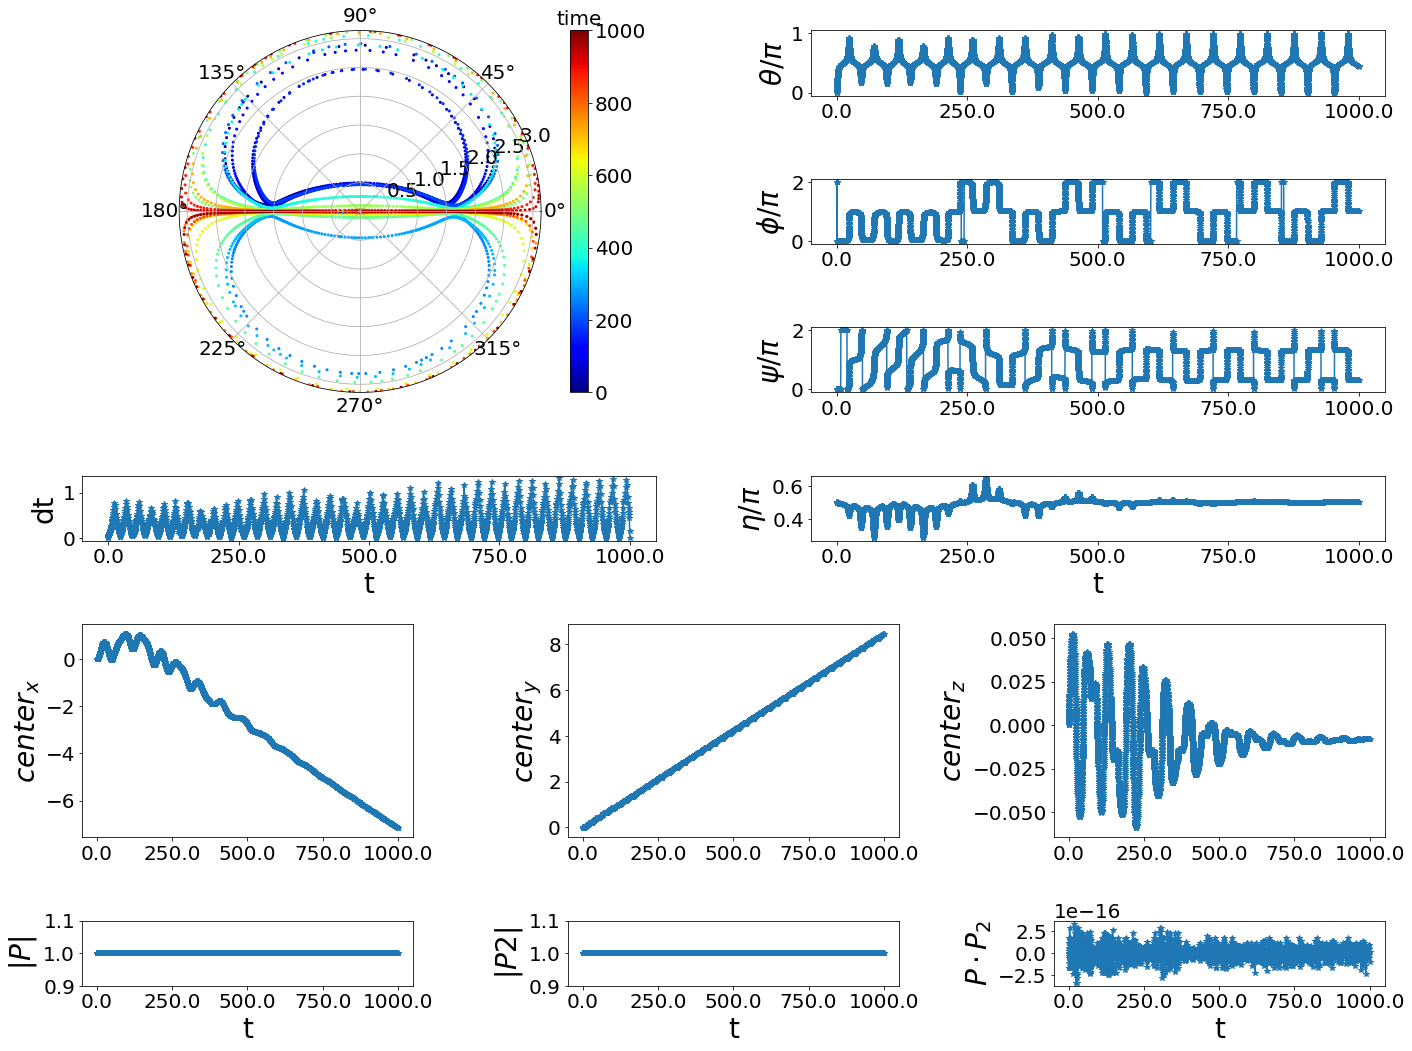

In [8]:
# passive helix Rk4n method. 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 1000
update_fun='RK45'
rtol=1e-9
atol=1e-12
eval_dt = 1e-3
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_helix_RK4n(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('scipy', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)


last norm:  1.537636892758573 , 1.768726324422733 , 5.549198093375227
do_calculate_ecoli_Petsc: run 100 loops/times using 5.900243s
scipy_RK45 rt1e-09, at1e-12, dt1e-03 5.9s


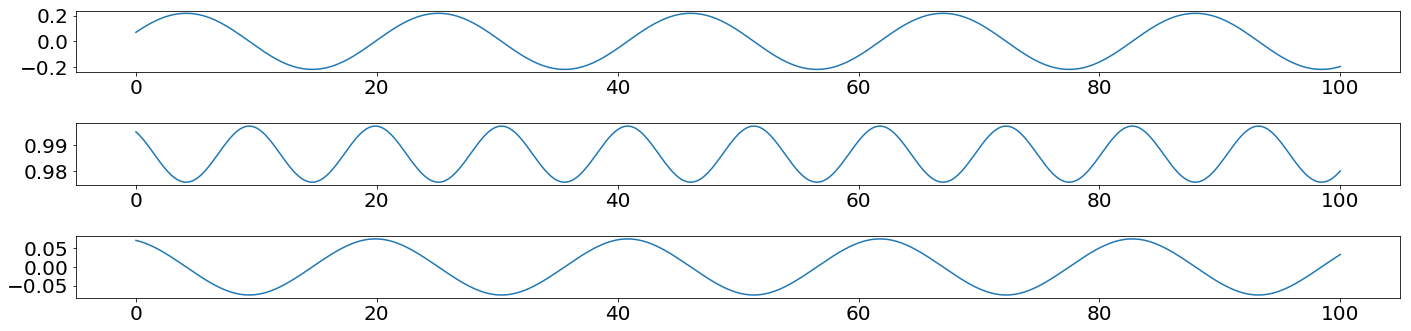

In [104]:
# passive ellipse Rk method. 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 1.5, 1.5, 0
max_t = 100
update_fun='RK45'
rtol=1e-9
atol=1e-12
eval_dt = 1e-3
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ellipse_RK(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('scipy', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)


last norm:  1.5376368945689431 , 1.7687263246653975 , 5.549198099237049
do_calculate_ecoli_Petsc: run 100 loops/times using 3.320057s
scipy_RK45 rt1e-09, at1e-12, dt1e-03 3.3s


True

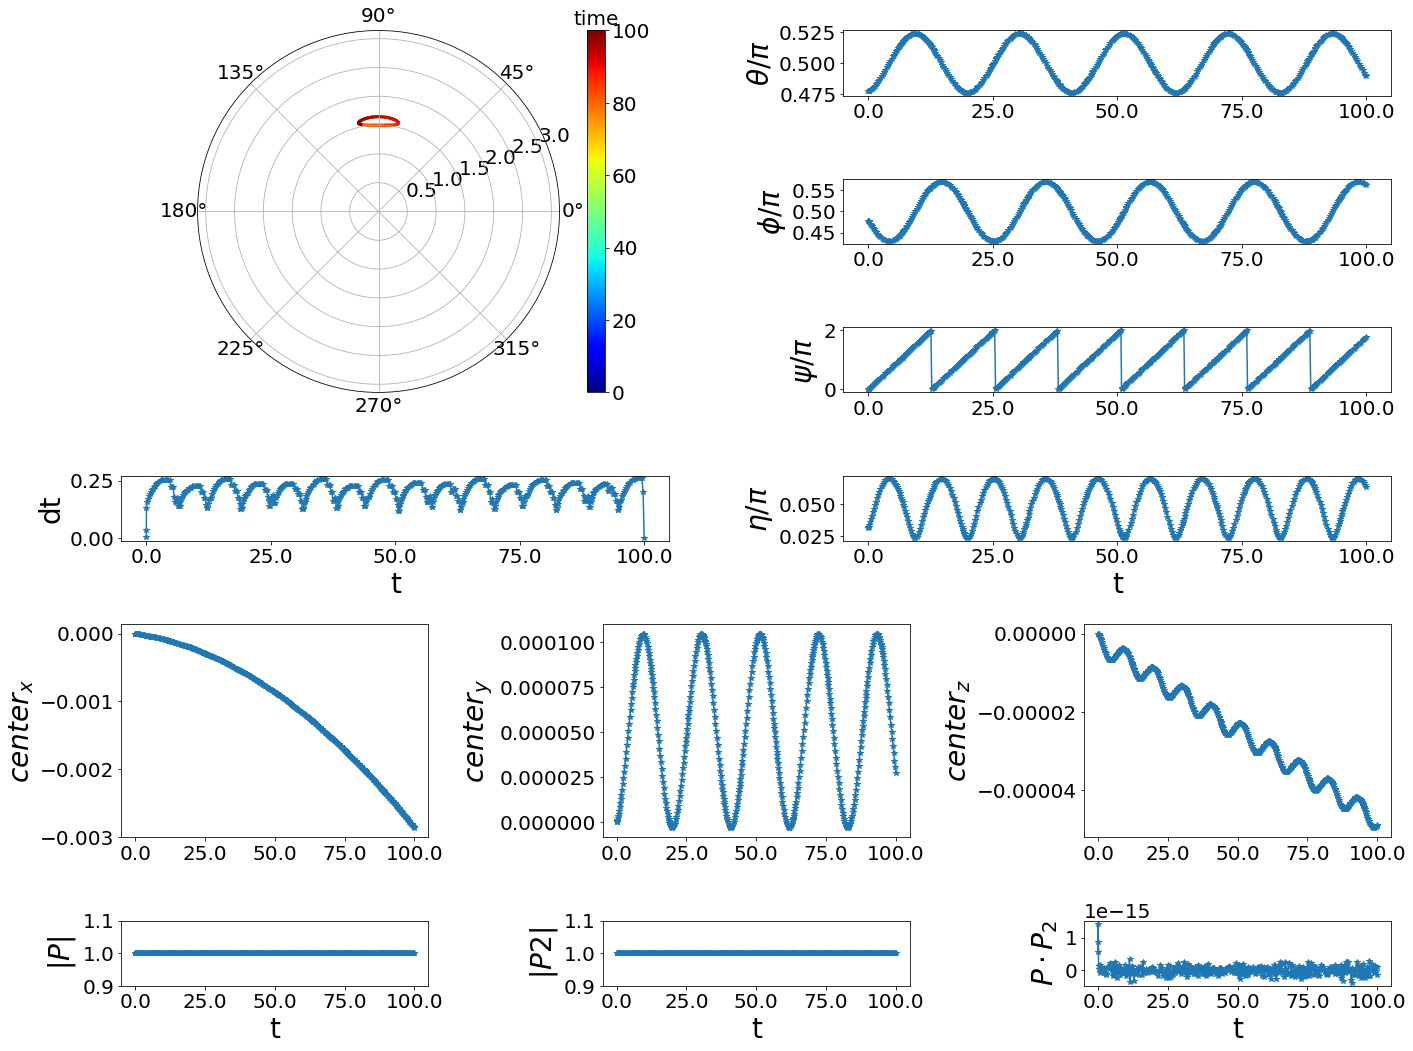

In [117]:
# passive ellipse Rk4n method. 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 1.5, 1.5, 0
max_t = 100
update_fun='RK45'
rtol=1e-9
atol=1e-12
eval_dt = 1e-3
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ellipse_RK4n(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('scipy', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)



last norm:  1.5376368927452881 , 1.768726324534965 , 5.549198091915981
do_calculate_ecoli_Petsc: run 100 loops/times using 403.424495s
scipy_4 rt1e-09, at1e-12, dt1e-02 403.4s


True

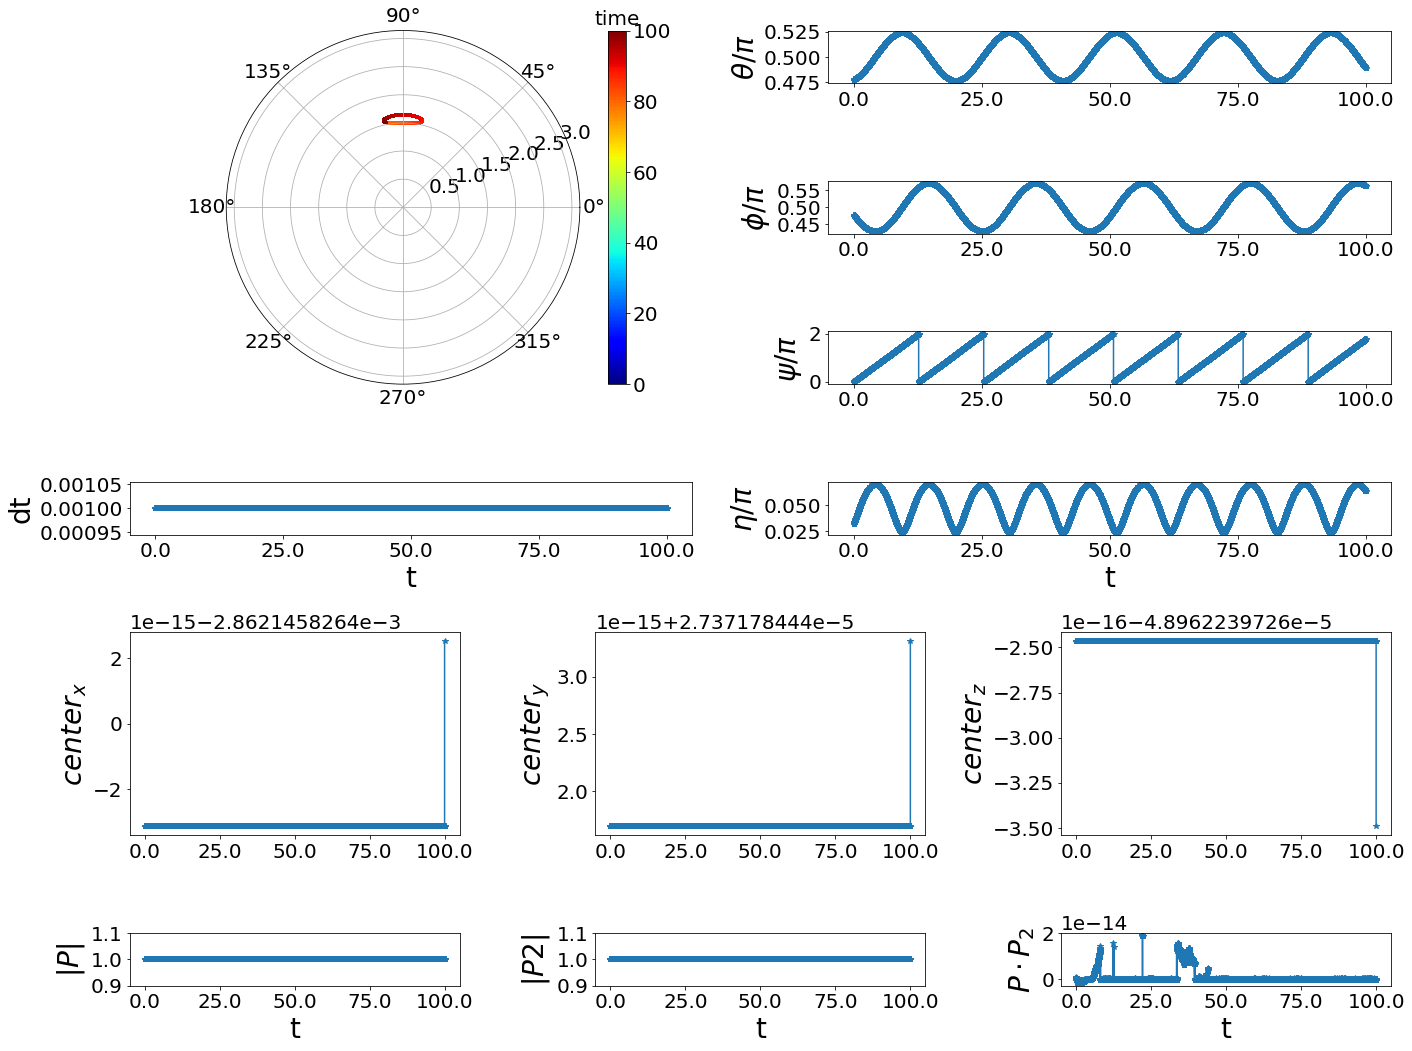

In [6]:
# passive ellipse Petsc4n method. 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 1.5, 1.5, 0
max_t = 100
update_fun='4'
rtol=1e-9
atol=1e-12
eval_dt = 1e-2
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ellipse_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('scipy', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)


last norm:  1.36048826821 , 0.100167261028 , 1.96164258225
do_calculate_ecoli_Petsc: run 100 loops/times using 7.932446s
PETSC RK_3bs rt1e-06, at1e-09, dt1e-03 7.9s


True

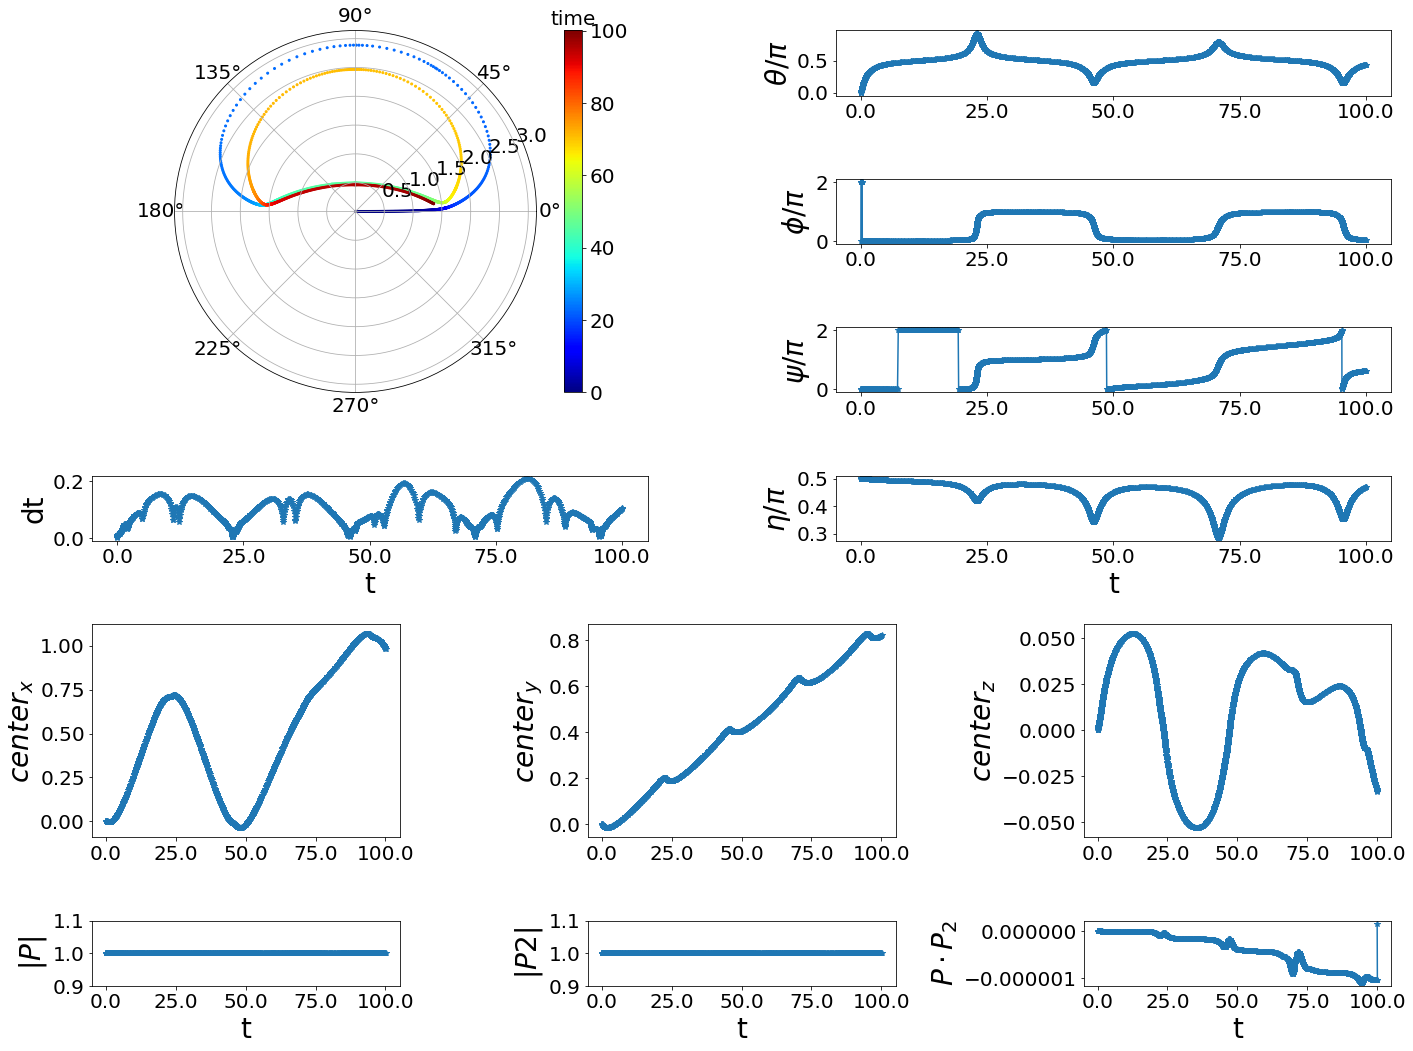

In [16]:
# passive helix petsc family method. 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 100
update_fun='3bs'
rtol=1e-6
atol=1e-9
eval_dt = 1e-3
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_helix_Petsc(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol, eval_dt=eval_dt)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

In [ ]:
# active ecoli runge kutta 4n method 
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 1000
update_fun='RK45'
table_name='planeShearRatex_1c_avr'
rtol=1e-3
atol=1e-6
eval_dt = 1e-3
save_every = np.ceil(1 / eval_dt / 100)

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_RK4n(tnorm, t_psi, max_t, update_fun=update_fun, 
                                     rtol=rtol, atol=atol, table_name=table_name)
t1 = time()
print('table_name: ', table_name)
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_RK4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, %.1fs' % ('RK4n', update_fun, rtol, atol, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
          Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every)
idx = np.load('../motion_ecoliB01_table/idx.npy')
t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
    pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('save to %s' % t_name)

load table_data from idx026_th0.000_ph0.000_ps0.000.pickle


True

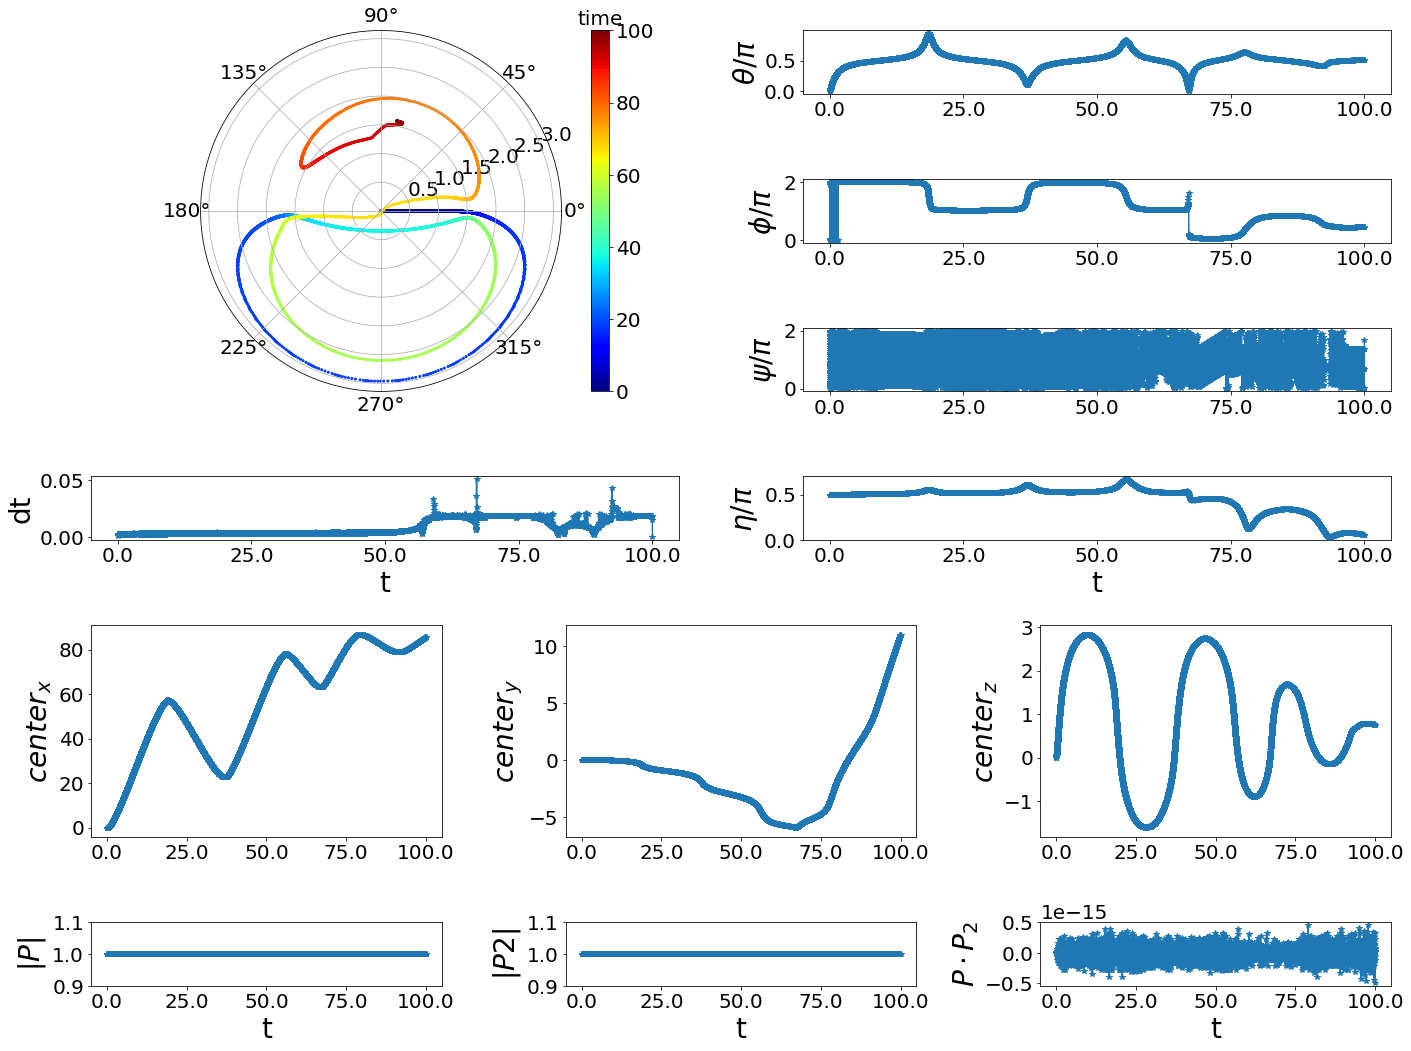

In [25]:
t_theta, t_phi, t_psi = 0, 0, 0
idx = 26
t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
with open('../motion_ecoliB01_table/%s' % t_name, 'rb') as handle:
    tpick = pickle.load(handle)
(t_theta, t_phi, t_psi, 
 max_t, update_fun, rtol, atol, eval_dt, 
 Table_t, Table_X, Table_P, Table_P2, 
 Table_theta, Table_phi, Table_psi, Table_eta, 
 save_every) = tpick
print('load table_data from %s' % t_name)

spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

In [24]:
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])


last norm:  1.581958744332241 , 1.448685388842651 , 2.038745612026268
